In [1]:
%pip install opencv-python
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt
import skimage.exposure as exposure

In [3]:
def displayImages(images, grid_shape):
    x,y = grid_shape
    # Create subplots
    fig, axs = plt.subplots(x, y, figsize=(15,10))
    axs = axs.flatten()

    for i, (image, title) in enumerate(images):
        axs[i].imshow(image, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(title)

    return axs

# DEPRECATED (je le garde au cas où)
# !! images must be in RGB format or grayscale
def convertBGRarray2RGB(images):
    return [(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), name) if len(image.shape) == 3 else (image, name) for (image, name) in images]

array([<Axes: title={'center': 'Original'}>,
       <Axes: title={'center': 'R'}>, <Axes: title={'center': 'G'}>,
       <Axes: title={'center': 'B'}>], dtype=object)

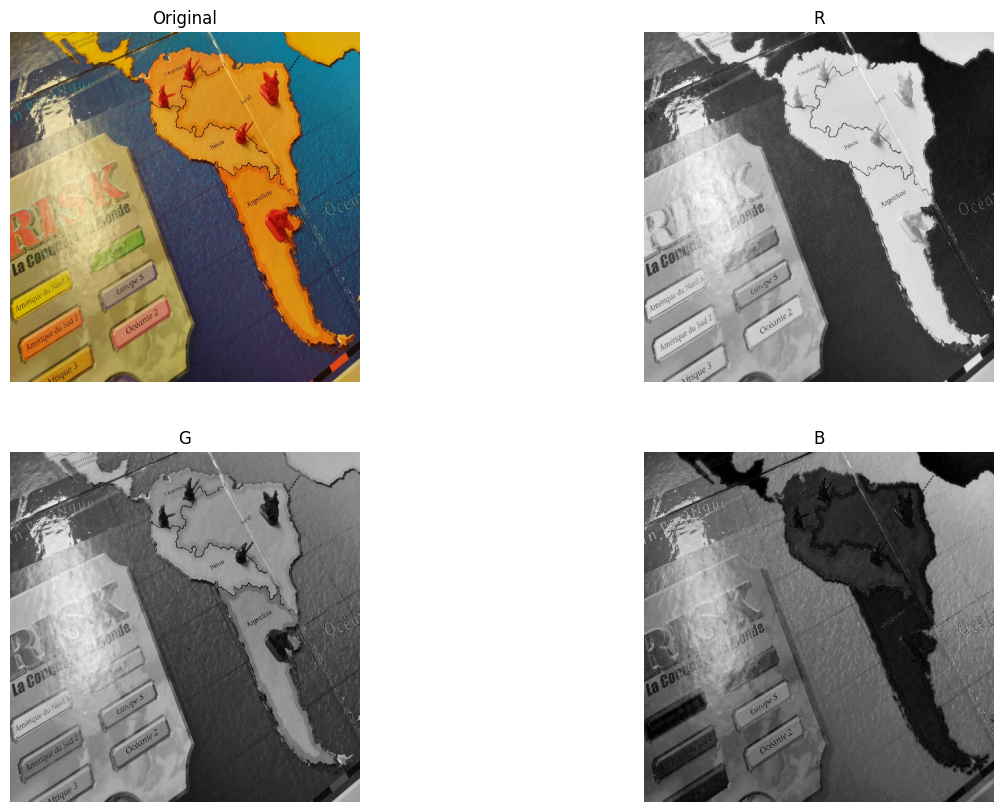

In [4]:
# Lecture de l'image + preprocessing (redimension 512x512 & conversion BGR to RGB)
im = cv2.imread('data/gsm/colors_red.jpg')
im = cv2.resize(im, (512,512))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# On crée un liste d'images à afficher
images = [(im, 'Original')]
for (name, channel) in zip(("R", "G", "B"), cv2.split(im)):
	images.append((channel, name))
 
# On affiche les images avec mathplotlib
displayImages(images, (2,2))

True

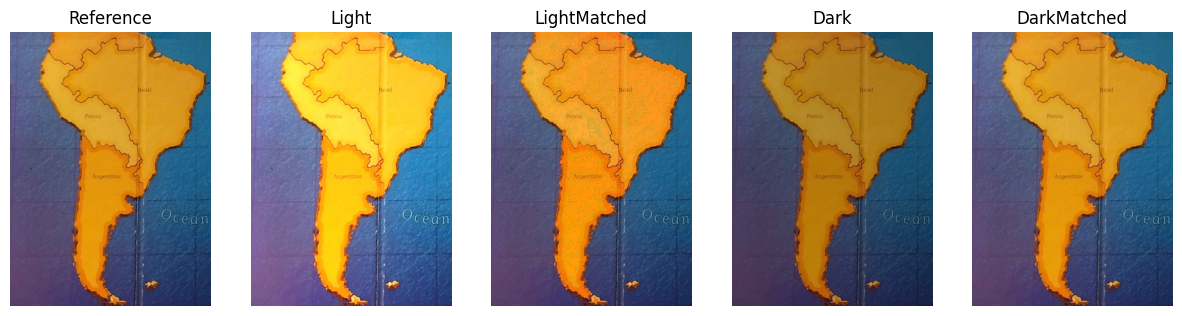

In [5]:
# Ouverture d'images
AL_normal_reference = cv2.imread('data/gsm/amerique_latine.jpg')
AL_light_toUpdate = cv2.imread('data/gsm/amerique_latine_light.jpg')
AL_dark_toUpdate = cv2.imread('data/gsm/amerique_latine_dark.jpg')

# Conversion BGR to RGB
AL_normal_reference = cv2.cvtColor(AL_normal_reference, cv2.COLOR_BGR2RGB)
AL_light_toUpdate = cv2.cvtColor(AL_light_toUpdate, cv2.COLOR_BGR2RGB)
AL_dark_toUpdate = cv2.cvtColor(AL_dark_toUpdate, cv2.COLOR_BGR2RGB)

# Match des histogrammes
lightMatched = exposure.match_histograms(AL_light_toUpdate, AL_normal_reference , 
                           channel_axis=-1) 
darkMatched = exposure.match_histograms(AL_dark_toUpdate, AL_normal_reference , 
                           channel_axis=-1) 

# On crée la liste d'images à afficher
images = [(AL_normal_reference, 'Reference'), (AL_light_toUpdate, 'Light'), (lightMatched, 'LightMatched'), (AL_dark_toUpdate, 'Dark'), (darkMatched, 'DarkMatched')]

# On affiche les images avec mathplotlib
displayImages(images, (1, len(images)))

# On doit reocnvertir les images en BGR pour les sauvegarder
cv2.imwrite('data/gsm/outputs/amerique_latine_matched.jpg', cv2.cvtColor(lightMatched, cv2.COLOR_RGB2BGR))
cv2.imwrite('data/gsm/outputs/amerique_latine_light.jpg', cv2.cvtColor(AL_light_toUpdate, cv2.COLOR_RGB2BGR))
cv2.imwrite('data/gsm/outputs/amerique_latine_reference.jpg', cv2.cvtColor(AL_normal_reference, cv2.COLOR_RGB2BGR))
cv2.imwrite('data/gsm/outputs/amerique_latine_dark.jpg', cv2.cvtColor(AL_dark_toUpdate, cv2.COLOR_RGB2BGR))
cv2.imwrite('data/gsm/outputs/amerique_latine_dark_matched.jpg', cv2.cvtColor(darkMatched, cv2.COLOR_RGB2BGR))

In [6]:
def displayRGBHistogram(images, removeValueZero=True):
    fig, axes = plt.subplots(nrows=3, ncols=len(images), figsize=(8, 8)) 
    for i, (img, name) in enumerate(images):
        for c, c_color in enumerate(('red', 'green', 'blue')): 
            channel_data = img[..., c]
            if removeValueZero:
                channel_data = channel_data[channel_data > 0]
            
            img_hist, bins = exposure.histogram(channel_data,  
                                                    source_range='dtype')
            axes[c,i].plot(bins, img_hist / img_hist.max()) 
            img_cdf, bins = exposure.cumulative_distribution(img[..., c]) 
            axes[c,i].plot(bins, img_cdf) 
            axes[c,0].set_ylabel(c_color) 
            axes[0, i].set_title(name) 
    
    plt.tight_layout() 
    plt.show() 

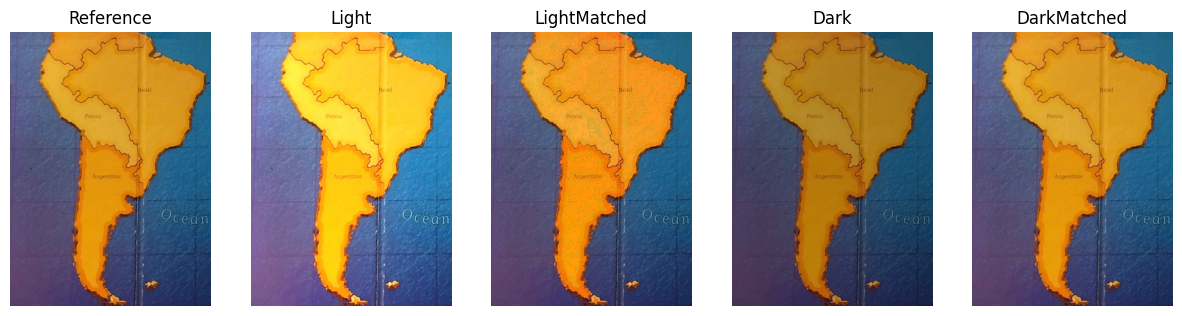

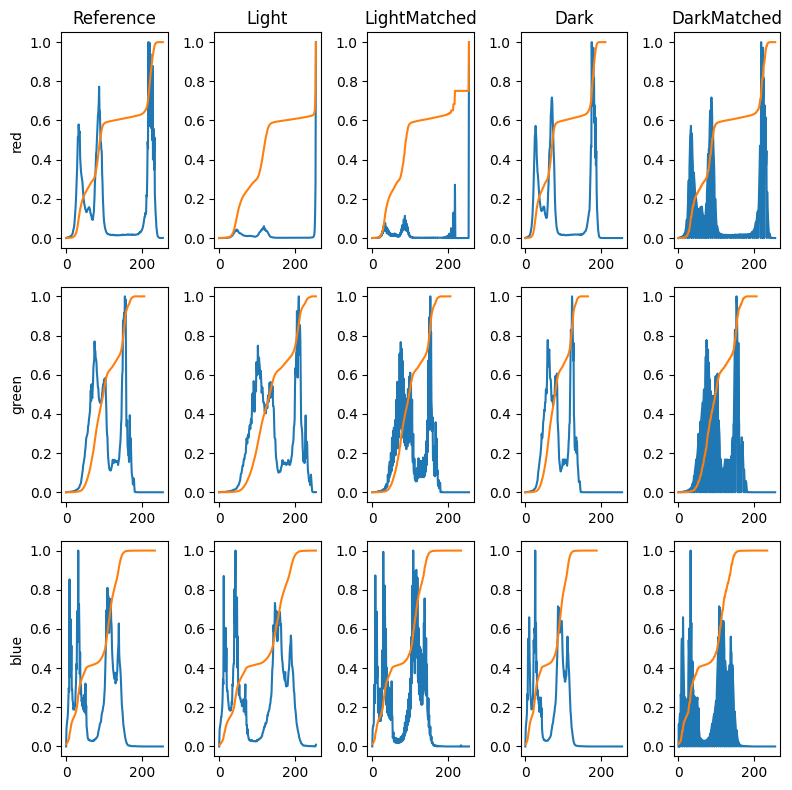

In [7]:
displayImages(images, (1,len(images)))
displayRGBHistogram(images)

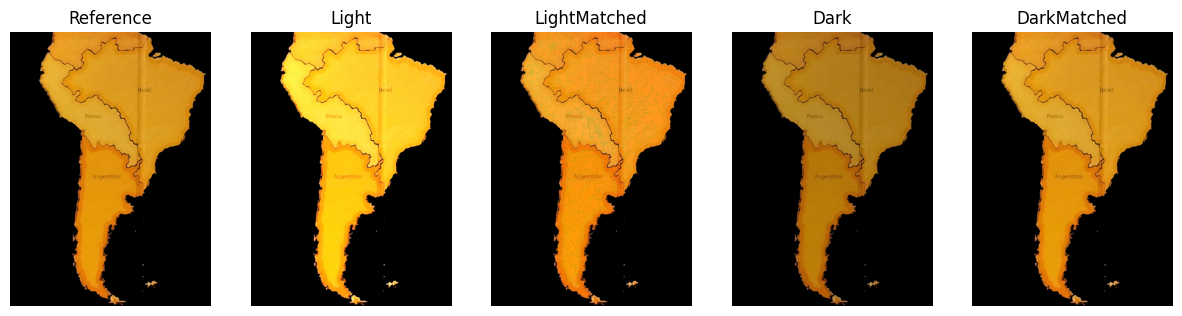

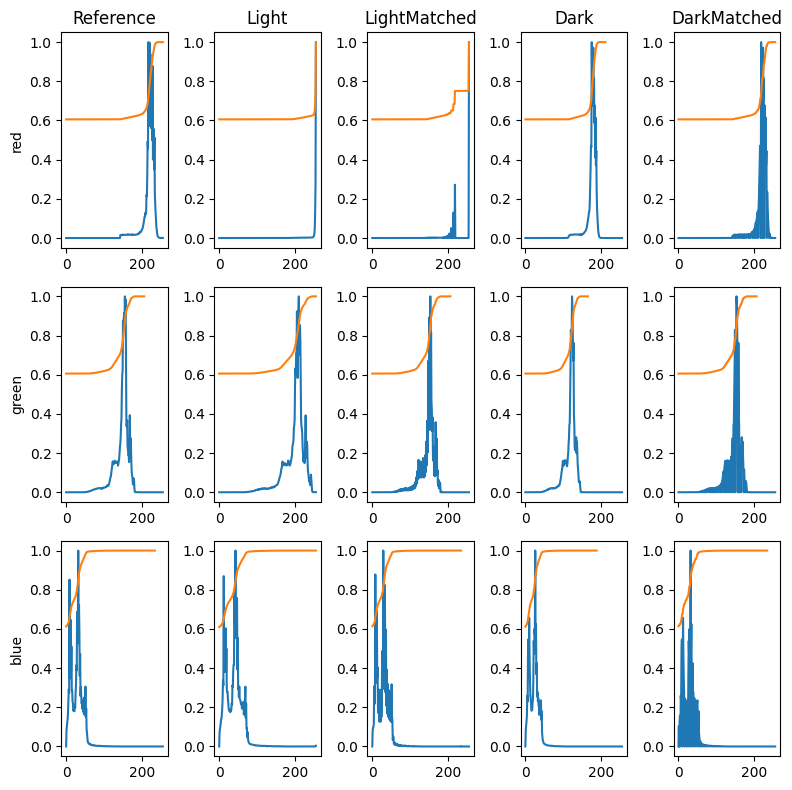

In [8]:
(AL_normal_referenceR,_,_) = cv2.split(AL_normal_reference)
(_,Argentine_mask) = cv2.threshold(AL_normal_referenceR, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

maskedImages = []
for (img, name) in images:
    maskedImages.append((cv2.bitwise_and(img, img, mask=Argentine_mask), name))

displayImages(maskedImages, (1,len(images)))
displayRGBHistogram(maskedImages)

In [9]:
# permet de plot en dehors de Jupyter
%matplotlib qt

# permet de plot dans Jupyter
#%matplotlib inline